<a href="https://colab.research.google.com/github/joeenn/Kapita-Selekta-Matematika-Terapan/blob/main/Sentiment%20Analysis%20for%20Review%20FIlm%20Frozen%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Data = pd.read_excel('Data review FROZEN 2.xlsx', header=0) #import data dalam bentuk file .xlsx
Data

No  ...                                     reviewers_text
0      1  ...  Frozen 2 is for kids. I know that is true, but...
1      2  ...  A neighboring kingdom helps build a dam which ...
2      3  ...  I don't see first part, just new year one spec...
3      4  ...  Very terrible . do not recommend to watch it a...
4      5  ...  Let it blow let it blow.... well frozen II tot...
..   ...  ...                                                ...
245  246  ...  Not with speech, but with facial expression, v...
246  247  ...  Anna, Elsa, Kristoff, Olaf and Sven leave Aren...
247  248  ...  Frozen 2 was a fantastic sequel and a fantasti...
248  249  ...  Seeing this in a theatre filled with families ...
249  250  ...  This film is good beyond words. It's definitel...

[250 rows x 5 columns]

In [ ]:
Data.dropna(subset = ["reviewers_text"], inplace=True)

In [ ]:
!pip install beautifulsoup4
!pip install lxml
!pip install nltk==3.5

In [ ]:
for i in range(len(Data.reviewers_text)): #lower text
  Data.reviewers_text[i] = Data.reviewers_text[i].lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import nltk #CLEANSING
nltk.download('punkt')
import string 
import re #regex library

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
for i in range(len(Data.reviewers_text)):
  Data.reviewers_text[i] = re.sub(r"\d+", "", Data.reviewers_text[i])
  String_without_punctuation = ''
  for character in Data.reviewers_text[i]:
    if character not in set(string.punctuation):
      String_without_punctuation += character
    else:
      String_without_punctuation += ' '
    
    Data.reviewers_text[i] = String_without_punctuation
  Data.reviewers_text[i] = Data.reviewers_text[i].strip()
  Data.reviewers_text[i] = re.sub('\s+',' ',Data.reviewers_text[i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path(

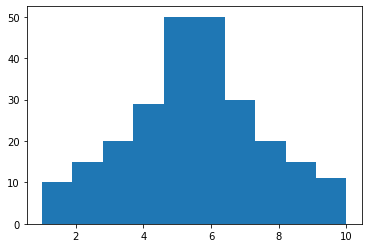

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Data.reviewers_rating)
plt.show()

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


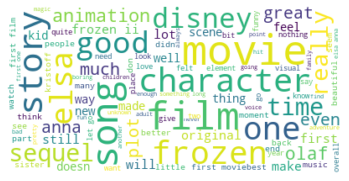

In [ ]:
textt = " ".join(review for review in Data.reviewers_text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("first_review.png") #output file

In [ ]:
remove_score = 5
#Data = Data[Data['reviewers_rating'] != remove_score]
Data['sentiment'] = Data['reviewers_rating'].apply(lambda rating : +1 if rating > remove_score else -1)
positive = Data[Data['sentiment'] == 1]
negative = Data[Data['sentiment'] == -1]

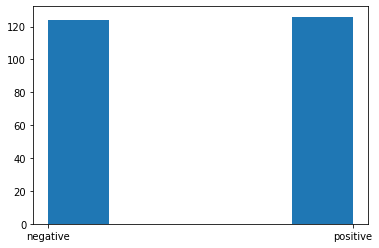

In [ ]:
Data['sentimentt'] = Data['sentiment'].replace({-1 : 'negative'})
Data['sentimentt'] = Data['sentimentt'].replace({1 : 'positive'})
plt.hist(Data.sentimentt, bins=5)

plt.show()

In [ ]:
print('Banyaknya komentar positif: ',positive.reviewers_text.count())
print('Banyaknya komentar negatif: ',negative.reviewers_text.count())

Banyaknya komentar positif:  126
Banyaknya komentar negatif:  124


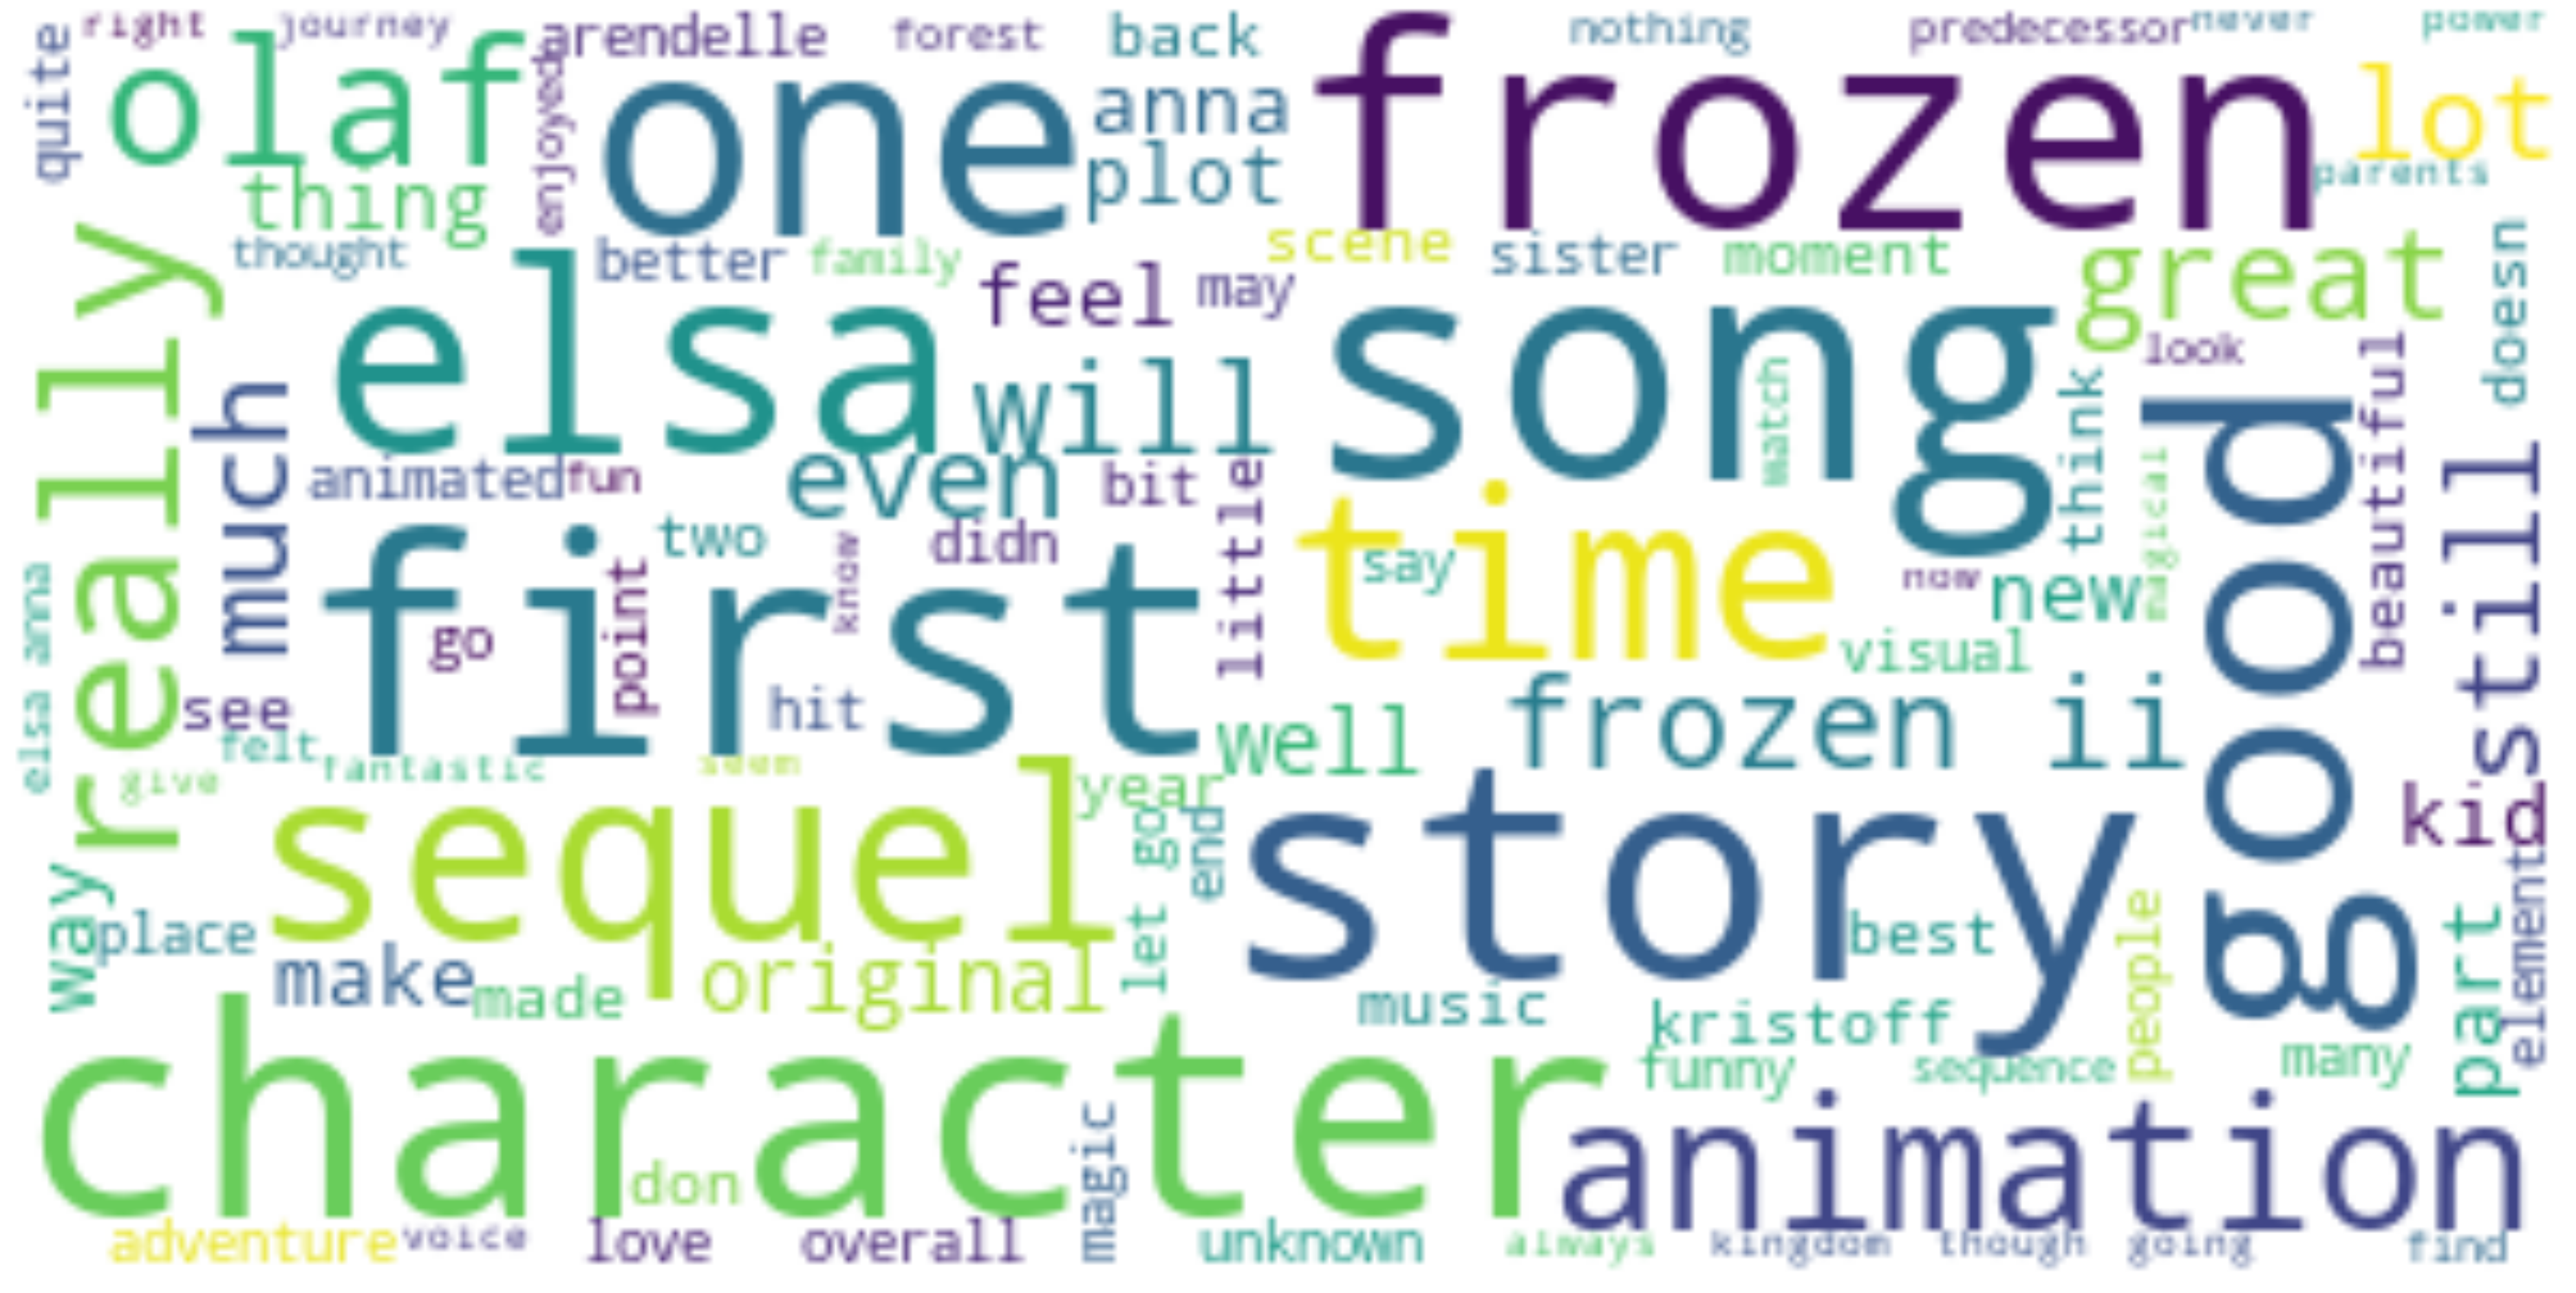

In [ ]:
textt = " ".join(review for review in positive.reviewers_text)

textt_list = textt.split(' ')

remove_words = ['movie','film','disney']
textt_list_new = [word for word in textt_list if word not in remove_words]

textt = ' '.join(textt_list_new)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textt)
plt.figure(figsize=(64, 48), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

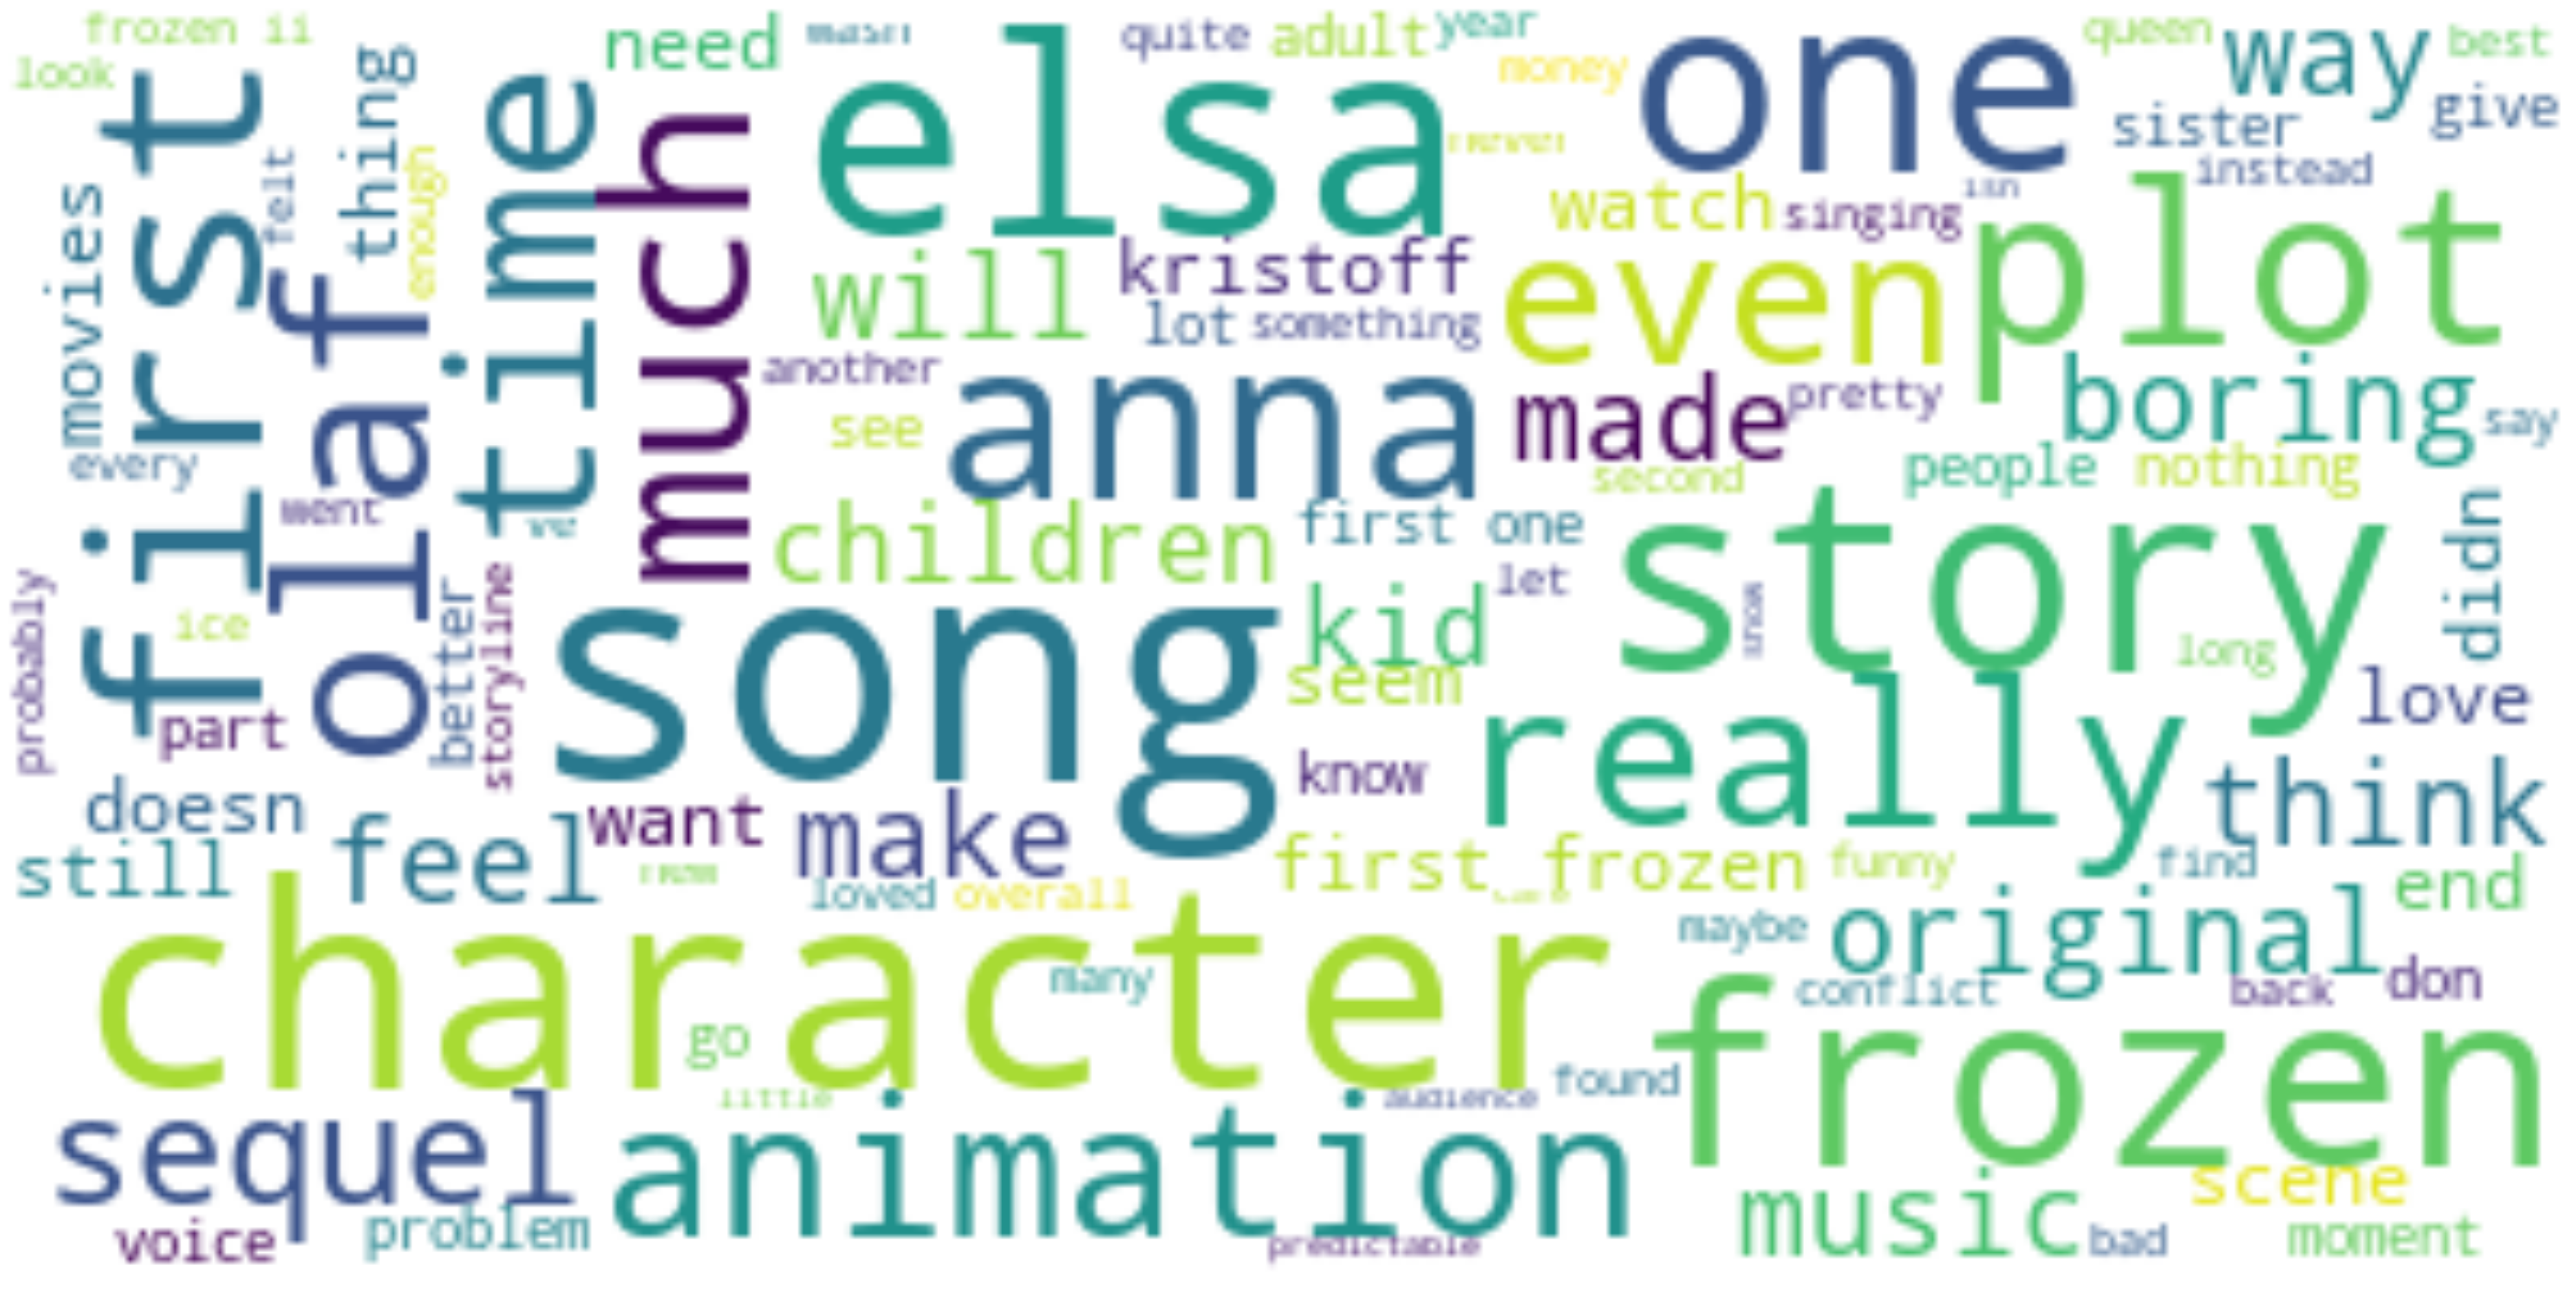

In [ ]:
textt = " ".join(review for review in negative.reviewers_text)

textt_list = textt.split(' ')

remove_words = ['good','movie','well','great','film','disney']
textt_list_new = [word for word in textt_list if word not in remove_words]

textt = ' '.join(textt_list_new)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textt)
plt.figure(figsize=(64, 48), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Splitting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
Data

No   reviewers_name  ...  sentiment sentimentt
0      1  digitalbeachbum  ...         -1   negative
1      2   allanmichael30  ...         -1   negative
2      3  edgy-827-486965  ...         -1   negative
3      4      monaa-18715  ...         -1   negative
4      5    blueangelical  ...         -1   negative
..   ...              ...  ...        ...        ...
245  246        catpantry  ...          1   positive
246  247         dilipbts  ...          1   positive
247  248       colewaters  ...          1   positive
248  249      namob-43673  ...          1   positive
249  250      dessi_jessi  ...          1   positive

[250 rows x 7 columns]

In [ ]:
DataNew = Data[['reviewers_title','sentiment']]
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() #review titlenya dijadiin angka
X = vectorizer.fit_transform(DataNew['reviewers_title']).toarray()
y = DataNew['sentiment']

In [ ]:
#Splitting data dengan Scikit-Learn, dengan training 80% dan testing 20%.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#Normalisasi

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

DecisionTreeClassifier()


In [ ]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



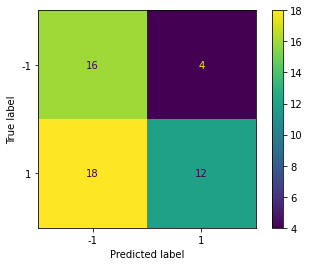

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  4]
 [18 12]]
              precision    recall  f1-score   support

          -1       0.47      0.80      0.59        20
           1       0.75      0.40      0.52        30

    accuracy                           0.56        50
   macro avg       0.61      0.60      0.56        50
weighted avg       0.64      0.56      0.55        50





# KNN



In [ ]:
#Training dan Prediction
#Membentuk model dengan n=13

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
#Memprediksi model

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



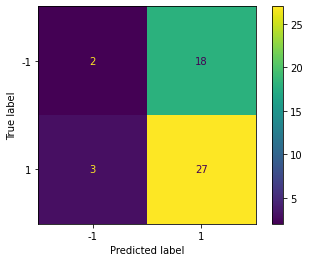

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2 18]
 [ 3 27]]
              precision    recall  f1-score   support

          -1       0.40      0.10      0.16        20
           1       0.60      0.90      0.72        30

    accuracy                           0.58        50
   macro avg       0.50      0.50      0.44        50
weighted avg       0.52      0.58      0.50        50



In [ ]:
import numpy as np

#Comparing Error Rate with the K Value

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

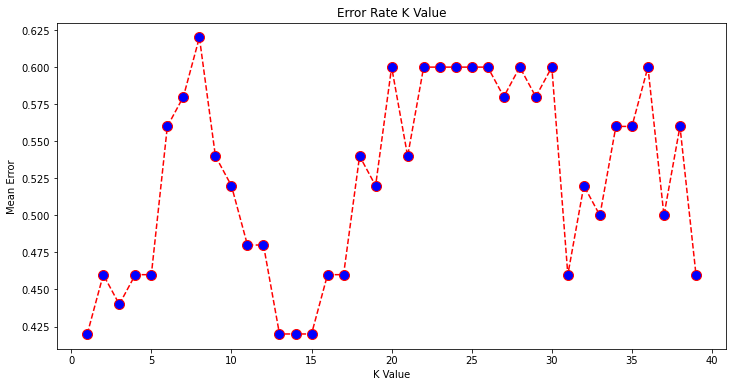

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train, y_train)

In [ ]:
#Splitting data dengan Scikit-Learn, dengan training 80% dan testing 20%.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Training model

from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB

GaussianNB()

In [ ]:
import numpy as np

model_NB.fit(X_train,y_train)

y_pred_NB=model_NB.predict(X_test)

print(y_pred_NB)
print(np.array(y_test))

[-1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1
 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1]
[-1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1  1  1
 -1 -1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



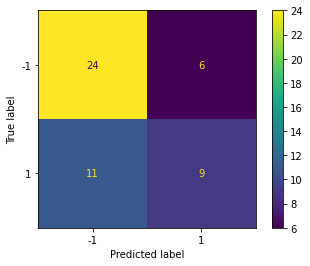

In [ ]:
#Mengevaluasi hasil data

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_NB, X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))

[[24  6]
 [11  9]]
              precision    recall  f1-score   support

          -1       0.69      0.80      0.74        30
           1       0.60      0.45      0.51        20

    accuracy                           0.66        50
   macro avg       0.64      0.62      0.63        50
weighted avg       0.65      0.66      0.65        50

